Dataset train.csv, test.csv, train_hourly.csv, dan test_hourly.csv diimpor pada tahapan ini. Dataset ini nantinya akan diolah sehingga menjadi dataset yang proper untuk proses preprocessing lebih lanjut dan modelling yang akan dilakukan pada bagian selanjutnya

In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv')
train_hourly = pd.read_csv('train_hourly.csv')
test = pd.read_csv('test.csv')
test_hourly = pd.read_csv('test_hourly.csv')

all = [train, train_hourly,test,test_hourly]

for df in all:
  print(df.shape)

(13258, 16)
(318192, 32)
(4972, 16)
(119328, 32)


##**Part 1: Dataset Train dan Test**##

In [2]:
train.head(10)

,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),shortwave_radiation_sum (MJ/m²),rain_sum (mm),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),elevation,city
0,2018-01-01,29.9,26.0,36.3,31.6,2018-01-01T05:15,2018-01-01T17:49,17.59,7.7,0.0,6.9,20.2,277.0,3.61,0,su
1,2018-01-02,30.6,25.7,37.7,31.2,2018-01-02T05:15,2018-01-02T17:50,19.87,9.4,0.0,7.1,18.0,168.0,4.11,0,su
2,2018-01-03,31.8,25.9,40.3,31.7,2018-01-03T05:16,2018-01-03T17:50,20.44,7.8,0.0,8.1,21.2,125.0,4.23,0,su
3,2018-01-04,30.8,26.0,39.1,31.6,2018-01-04T05:16,2018-01-04T17:50,20.44,29.7,0.0,7.2,21.6,190.0,4.22,0,su
4,2018-01-05,30.9,25.2,37.6,29.9,2018-01-05T05:17,2018-01-05T17:51,20.10,22.5,0.0,6.9,21.2,241.0,4.16,0,su
5,2018-01-06,31.0,25.6,38.1,30.9,2018-01-06T05:17,2018-01-06T17:51,19.81,8.7,0.0,10.3,20.2,253.0,4.08,0,su
6,2018-01-07,29.3,25.1,34.7,29.9,2018-01-07T05:18,2018-01-07T17:52,13.01,7.8,0.0,10.6,22.7,284.0,2.78,0,su
7,2018-01-08,31.4,25.4,38.0,30.6,2018-01-08T05:18,2018-01-08T17:52,19.78,6.4,0.0,7.1,17.6,133.0,4.21,0,su
8,2018-01-09,31.9,25.7,39.3,31.2,2018-01-09T05:19,2018-01-09T17:52,20.13,9.1,0.0,12.1,25.6,272.0,4.22,0,su
9,2018-01-10,31.9,25.5,36.9,29.8,2018-01-10T05:19,2018-01-10T17:53,19.46,10.1,0.0,14.8,34.2,278.0,4.24,0,su


In [3]:
test.head(10)

,id,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),shortwave_radiation_sum (MJ/m²),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),elevation,city
0,0,2021-08-02,32.3,25.3,38.2,29.6,2021-08-02T05:39,2021-08-02T17:30,20.79,0.0,7.6,16.9,134.0,4.45,0,su
1,1,2021-08-03,31.7,25.5,37.4,30.3,2021-08-03T05:39,2021-08-03T17:30,20.01,0.0,10.2,21.6,131.0,4.32,0,su
2,2,2021-08-04,32.6,25.7,37.1,30.8,2021-08-04T05:39,2021-08-04T17:30,20.89,0.0,17.3,32.4,116.0,4.73,0,su
3,3,2021-08-05,32.0,25.7,36.8,31.1,2021-08-05T05:39,2021-08-05T17:30,22.19,0.0,15.8,29.2,115.0,4.96,0,su
4,4,2021-08-06,31.9,26.3,36.0,31.6,2021-08-06T05:38,2021-08-06T17:30,21.84,0.0,20.2,36.7,106.0,4.99,0,su
5,5,2021-08-07,31.7,27.0,36.1,31.9,2021-08-07T05:38,2021-08-07T17:30,20.43,0.0,16.9,33.8,107.0,4.68,0,su
6,6,2021-08-08,31.6,27.0,36.5,32.0,2021-08-08T05:38,2021-08-08T17:30,20.67,0.0,17.1,34.6,106.0,4.63,0,su
7,7,2021-08-09,31.7,26.8,36.9,31.5,2021-08-09T05:38,2021-08-09T17:30,20.20,0.0,15.8,29.9,115.0,4.51,0,su
8,8,2021-08-10,32.0,26.2,37.1,31.3,2021-08-10T05:37,2021-08-10T17:30,21.56,0.0,14.5,27.7,120.0,4.88,0,su
9,9,2021-08-11,31.8,24.0,35.2,27.6,2021-08-11T05:37,2021-08-11T17:30,23.82,0.0,15.7,30.2,128.0,5.37,0,su


Perhatikan bahwa fitur 'id' pada dataset testing bersifat unik dan terurut pada setiap barisnya, sehingga lebih baik di drop untuk mendapatkan hasil prediksi yang lebih baik 

In [4]:
test.drop(['id'],axis=1,inplace=True)
test.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),shortwave_radiation_sum (MJ/m²),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),elevation,city
0,2021-08-02,32.3,25.3,38.2,29.6,2021-08-02T05:39,2021-08-02T17:30,20.79,0.0,7.6,16.9,134.0,4.45,0,su
1,2021-08-03,31.7,25.5,37.4,30.3,2021-08-03T05:39,2021-08-03T17:30,20.01,0.0,10.2,21.6,131.0,4.32,0,su
2,2021-08-04,32.6,25.7,37.1,30.8,2021-08-04T05:39,2021-08-04T17:30,20.89,0.0,17.3,32.4,116.0,4.73,0,su
3,2021-08-05,32.0,25.7,36.8,31.1,2021-08-05T05:39,2021-08-05T17:30,22.19,0.0,15.8,29.2,115.0,4.96,0,su
4,2021-08-06,31.9,26.3,36.0,31.6,2021-08-06T05:38,2021-08-06T17:30,21.84,0.0,20.2,36.7,106.0,4.99,0,su


Pada tahapan ini, akan didapatkan nama untuk setiap fitur pada dataset. Ini akan memudahkan pada saat melakukan *feature engineering* nantinya, dimana sejumlah fitur tertentu akan di recall (ditulis) kembali untuk proses pembuatan fitur terbaru dan drop fitur.

In [5]:
for df in train.columns:
  print(df)

time
temperature_2m_max (°C)
temperature_2m_min (°C)
apparent_temperature_max (°C)
apparent_temperature_min (°C)
sunrise (iso8601)
sunset (iso8601)
shortwave_radiation_sum (MJ/m²)
rain_sum (mm)
snowfall_sum (cm)
windspeed_10m_max (km/h)
windgusts_10m_max (km/h)
winddirection_10m_dominant (°)
et0_fao_evapotranspiration (mm)
elevation
city


In [6]:
part1 = [train,test]

for df in part1:
  print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13258 entries, 0 to 13257
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             13258 non-null  object 
 1   temperature_2m_max (°C)          13208 non-null  float64
 2   temperature_2m_min (°C)          13208 non-null  float64
 3   apparent_temperature_max (°C)    13208 non-null  float64
 4   apparent_temperature_min (°C)    13208 non-null  float64
 5   sunrise (iso8601)                13258 non-null  object 
 6   sunset (iso8601)                 13258 non-null  object 
 7   shortwave_radiation_sum (MJ/m²)  13198 non-null  float64
 8   rain_sum (mm)                    13198 non-null  float64
 9   snowfall_sum (cm)                13198 non-null  float64
 10  windspeed_10m_max (km/h)         13208 non-null  float64
 11  windgusts_10m_max (km/h)         13208 non-null  float64
 12  winddirection_10m_

**Modifikasi Fitur**

Pada tahapan ini, akan dibuat sejumlah fitur baru, yang mencakup sebagai berikut: 

*   **year**: Tahun dari fitur time
*   **month**: Bulan dari fitur time

*   **sunrise_time** : Waktu terbitnya matahari
*   **sunset_time** : Waktu terbenamnya matahari
*   **sunrise_hour** : Jam terbitnya matahari
*   **sunrise_minute** : Menit terbitnya matahari
*   **sunset_hour** : Jam terbenamnya matahari
*   **sunset_minute** : Menit terbenamnya matahari

Mengingat fitur **sunset_minute** dan **sunrise_minute** pada dasarnya tidak terlalu mempengaruhi kuantitas curah hujan, maka dibuat fitur baru, yakni **sunrise_preprocessed** dan **sunset_preprocessed**. Secara umum, metode penentuan fitur tersebut adalah sebagai berikut:

1. Apabila menit pada suatu jam berada diatas 30, maka fitur baru merupakan waktu 1 jam setelah jam tersebut. Sebagai contoh, apabila matahari terbit pada pukul 05.39, maka fitur preprocessed akan membulatkan waktu tersebut menjadi pukul 6

2. Sebaliknya, apabila menit pada suatu jam berada dibawah atau sama dengan 30, maka fitur baru akan membulatkan waktu sebagaimana pada fitur **sunrise_hour** dan **sunset_hour**. Sebagai contoh, apabila matahari terbenam pada pukul 17.28, maka pada fitur preprocessed akan membulatkan menjadi pukul 17.




In [7]:
for df in part1:
  df['year'] = df['time'].apply(lambda x: x.split('-')[0])
  df['month'] = df['time'].apply(lambda x: x.split('-')[1])
  df['date'] = df['time'].apply(lambda x: x.split('T')[0])
  df.drop(['time'], axis=1, inplace=True)

In [8]:
for df in part1:
  df['sunrise'] = df['sunrise (iso8601)'].astype(str)
  df['sunset'] = df['sunset (iso8601)'].astype(str)
  df.drop(['sunrise (iso8601)','sunset (iso8601)'], axis=1, inplace=True)

In [9]:
for df in part1:
  df['sunrise_time'] = df['sunrise'].apply(lambda x: x.split('T')[1])
  df['sunset_time'] = df['sunset'].apply(lambda x: x.split('T')[1])
  df['sunrise_hour'] = df['sunrise_time'].apply(lambda x: x.split(':')[0]).astype(int)
  df['sunrise_minute'] = df['sunrise_time'].apply(lambda x: x.split(':')[1]).astype(int)
  df['sunset_hour'] = df['sunset_time'].apply(lambda x: x.split(':')[0]).astype(int)
  df['sunset_minute'] = df['sunset_time'].apply(lambda x: x.split(':')[1]).astype(int)
  df['sunset_preprocessed'] = [x+1 if y>30 else x for x,y in zip(df['sunset_hour'], df['sunset_minute'])]
  df['sunrise_preprocessed'] = [x+1 if y>30 else x for x,y in zip(df['sunrise_hour'], df['sunrise_minute'])]
  df.drop(['sunrise_time', 'sunset_time', 'sunrise', 'sunset','sunrise_hour', 'sunrise_minute', 'sunset_hour', 'sunset_minute'], axis=1, inplace=True)

**Handling Distribusi Skew**

Tahapan ini bertujuan untuk mengetahui nilai skew dari masing-masing fitur

In [10]:
cat = ['city', 'year', 'month', 'date']

candidate = list(train.columns)
candidate.remove('city'), candidate.remove('year'), candidate.remove('month'), candidate.remove('date'), candidate.remove('rain_sum (mm)')

for df in part1:
  for col in candidate:
    print(col, "=", df[col].skew().round(2))

temperature_2m_max (°C) = -1.83
temperature_2m_min (°C) = -1.76
apparent_temperature_max (°C) = -1.62
apparent_temperature_min (°C) = -1.52
shortwave_radiation_sum (MJ/m²) = -0.84
snowfall_sum (cm) = 13.37
windspeed_10m_max (km/h) = 1.52
windgusts_10m_max (km/h) = 1.55
winddirection_10m_dominant (°) = 0.16
et0_fao_evapotranspiration (mm) = -0.57
elevation = 1.87
sunset_preprocessed = -2.37
sunrise_preprocessed = 3.81
temperature_2m_max (°C) = -1.8
temperature_2m_min (°C) = -1.69
apparent_temperature_max (°C) = -1.59
apparent_temperature_min (°C) = -1.46
shortwave_radiation_sum (MJ/m²) = -0.79
snowfall_sum (cm) = 10.0
windspeed_10m_max (km/h) = 1.89
windgusts_10m_max (km/h) = 1.61
winddirection_10m_dominant (°) = -0.22
et0_fao_evapotranspiration (mm) = -0.6
elevation = 1.95
sunset_preprocessed = -2.37
sunrise_preprocessed = 3.75


Pada bagian dibawah ini, terdapat repositori berisikan sejumlah metode yang dapat digunakan untuk mengatasi skew yang parah (diatas 1 atau dibawah -1)

Sejumlah metode yang digunakan mencakup sebagai berikut:
1. **Handling Skew Kanan** = Square Transform 
2. **Handling Skew Kiri** = Log Transform

In [11]:
for df in part1:
  for col in candidate:
    if (df[col].skew()>1):
      df[col] = df[col].map(lambda i: np.log(i) if i > 0 else 0)
    elif (df[col].skew()<-1):
      df[col] = df[col].map(lambda i: i**2)

In [12]:
for df in part1:
  for col in candidate:
    print(col, "=", df[col].skew().round(2))

temperature_2m_max (°C) = -0.63
temperature_2m_min (°C) = -0.62
apparent_temperature_max (°C) = -0.5
apparent_temperature_min (°C) = -0.52
shortwave_radiation_sum (MJ/m²) = -0.84
snowfall_sum (cm) = -3.07
windspeed_10m_max (km/h) = -0.27
windgusts_10m_max (km/h) = -2.69
winddirection_10m_dominant (°) = 0.16
et0_fao_evapotranspiration (mm) = -0.57
elevation = 0.87
sunset_preprocessed = -1.87
sunrise_preprocessed = 0.62
temperature_2m_max (°C) = -0.69
temperature_2m_min (°C) = -0.65
apparent_temperature_max (°C) = -0.53
apparent_temperature_min (°C) = -0.56
shortwave_radiation_sum (MJ/m²) = -0.79
snowfall_sum (cm) = -1.72
windspeed_10m_max (km/h) = 0.21
windgusts_10m_max (km/h) = 0.19
winddirection_10m_dominant (°) = -0.22
et0_fao_evapotranspiration (mm) = -0.6
elevation = 0.92
sunset_preprocessed = -1.85
sunrise_preprocessed = 0.97


**Handling Missing Value**

Tahapan ini dilakukan untuk mengetahui banyaknya missing value pada setiap fitur yang ada

In [13]:
for df in part1:
  print(df.isnull().sum())

temperature_2m_max (°C)             50
temperature_2m_min (°C)             50
apparent_temperature_max (°C)       50
apparent_temperature_min (°C)       50
shortwave_radiation_sum (MJ/m²)     60
rain_sum (mm)                       60
snowfall_sum (cm)                    0
windspeed_10m_max (km/h)             0
windgusts_10m_max (km/h)             0
winddirection_10m_dominant (°)     466
et0_fao_evapotranspiration (mm)     60
elevation                            0
city                                 0
year                                 0
month                                0
date                                 0
sunset_preprocessed                  0
sunrise_preprocessed                 0
dtype: int64
temperature_2m_max (°C)            0
temperature_2m_min (°C)            0
apparent_temperature_max (°C)      0
apparent_temperature_min (°C)      0
shortwave_radiation_sum (MJ/m²)    0
snowfall_sum (cm)                  0
windspeed_10m_max (km/h)           0
windgusts_10m_max (km/h)  

Tahapan ini dilakukan untuk mengetahui persentase missing value terhadap masing-masing dataset train.csv dan test.csv secara keseluruhan

In [14]:
for df in part1:
  print(df.isnull().sum().sum()/(len(df['year'])*(len(df.columns))))

0.003545029416201539
0.0


Karena persentase missing value yang kecil, maka diputuskan untuk dihapus saja dari dataset

In [15]:
for df in part1:
  df.dropna(inplace = True)

**Packaging**

Hasil *preprocessing* dan *feature engineering* yang sudah dilakukan akan disimpan ke dalam bentuk csv

In [16]:
train.to_csv('train_preprocessed.csv')

In [17]:
test.to_csv('test_preprocessed.csv')

##**Part 2: Dataset Train Hourly dan Test Hourly**##

In [18]:
train_hourly.head(10)

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),snowfall (cm),cloudcover (%),cloudcover_low (%),...,vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),city
0,2018-01-01T00:00,25.0,94.0,24.1,32.3,1007.0,1009.3,0.0,82.0,33.0,...,0.18,26.8,28.5,28.7,29.3,0.298,0.307,0.281,0.28,su
1,2018-01-01T01:00,25.2,92.0,23.8,32.5,1006.5,1008.8,0.0,100.0,45.0,...,0.27,26.6,28.4,28.7,29.3,0.298,0.307,0.281,0.28,su
2,2018-01-01T02:00,24.9,92.0,23.6,32.7,1006.1,1008.4,0.0,81.0,34.0,...,0.24,26.5,28.2,28.7,29.3,0.297,0.306,0.281,0.28,su
3,2018-01-01T03:00,25.1,89.0,23.3,32.1,1005.3,1007.6,0.0,65.0,29.0,...,0.33,26.2,28.1,28.7,29.3,0.296,0.305,0.282,0.28,su
4,2018-01-01T04:00,24.8,91.0,23.3,31.9,1005.3,1007.6,0.0,52.0,12.0,...,0.28,26.0,27.9,28.7,29.3,0.294,0.305,0.282,0.28,su
5,2018-01-01T05:00,24.3,94.0,23.4,31.7,1006.4,1008.7,0.0,65.0,23.0,...,0.17,25.9,27.8,28.7,29.3,0.293,0.304,0.282,0.28,su
6,2018-01-01T06:00,24.6,94.0,23.7,32.4,1006.8,1009.1,0.0,65.0,22.0,...,0.17,26.0,27.6,28.7,29.3,0.292,0.303,0.282,0.28,su
7,2018-01-01T07:00,26.1,88.0,24.0,32.6,1007.7,1010.0,0.0,62.0,17.0,...,0.39,28.1,27.7,28.7,29.3,0.291,0.302,0.282,0.28,su
8,2018-01-01T08:00,26.9,87.0,24.5,32.6,1008.0,1010.3,0.0,60.0,15.0,...,0.47,28.8,27.8,28.7,29.3,0.290,0.302,0.283,0.28,su
9,2018-01-01T09:00,27.7,86.0,25.1,35.0,1008.1,1010.4,0.0,56.0,17.0,...,0.54,30.0,28.0,28.7,29.3,0.289,0.301,0.283,0.28,su


In [19]:
test_hourly.head(10)

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),snowfall (cm),cloudcover (%),cloudcover_low (%),...,vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),city
0,2021-08-02T00:00,26.1,73.0,21.0,31.0,1010.9,1013.2,0.0,5.0,5.0,...,0.90,27.4,30.7,29.2,28.6,0.056,0.078,0.113,0.234,su
1,2021-08-02T01:00,25.6,75.0,20.8,31.0,1010.3,1012.6,0.0,5.0,5.0,...,0.82,26.9,30.6,29.2,28.6,0.056,0.078,0.113,0.234,su
2,2021-08-02T02:00,25.2,77.0,20.9,30.7,1010.3,1012.6,0.0,2.0,2.0,...,0.73,26.4,30.4,29.2,28.6,0.056,0.078,0.113,0.234,su
3,2021-08-02T03:00,24.7,78.0,20.7,30.1,1010.2,1012.5,0.0,9.0,10.0,...,0.68,25.9,30.3,29.2,28.6,0.056,0.078,0.113,0.234,su
4,2021-08-02T04:00,24.2,80.0,20.6,30.2,1010.7,1013.0,0.0,7.0,3.0,...,0.59,25.5,30.1,29.2,28.6,0.056,0.078,0.113,0.234,su
5,2021-08-02T05:00,23.8,82.0,20.6,29.9,1010.6,1012.9,0.0,3.0,3.0,...,0.53,25.0,29.9,29.2,28.6,0.056,0.078,0.113,0.234,su
6,2021-08-02T06:00,23.6,85.0,20.9,29.6,1011.3,1013.6,0.0,4.0,4.0,...,0.45,24.7,29.7,29.2,28.6,0.056,0.078,0.113,0.234,su
7,2021-08-02T07:00,25.6,73.0,20.5,29.8,1012.1,1014.4,0.0,2.0,1.0,...,0.87,26.3,29.6,29.2,28.6,0.056,0.078,0.113,0.234,su
8,2021-08-02T08:00,27.3,66.0,20.3,30.5,1012.6,1014.9,0.0,9.0,6.0,...,1.24,29.4,29.6,29.2,28.6,0.056,0.078,0.113,0.234,su
9,2021-08-02T09:00,28.9,59.0,20.0,34.8,1012.9,1015.2,0.0,6.0,4.0,...,1.63,32.7,29.7,29.2,28.6,0.056,0.078,0.113,0.234,su


In [20]:
part2 = [train_hourly, test_hourly]

**Modifikasi Fitur**

Pada tahapan ini, akan dibuat sejumlah fitur baru yang merupakan pengembangan dari fitur yang sudah ada

In [21]:
for df in part2:
  df['year'] = df['time'].apply(lambda x: x.split('-')[0])
  df['month'] = df['time'].apply(lambda x: x.split('-')[1])
  df['date'] = df['time'].apply(lambda x: x.split('T')[0])
  df['record'] = df['time'].apply(lambda x: x.split('T')[1])
  df['timestamp'] = df['record'].apply(lambda x: x.split(':')[0]).astype(int)
  df.drop(['time', 'record'], axis=1, inplace=True)

Pada tahapan ini, sejumlah fitur yang tidak berpengaruh ataupun relevan terhadap **rain_sum (mm)** akan di drop. Selain itu, juga akan ditambahkan sejumlah fitur baru yang relevan dengan variabel yang akan diprediksi

In [22]:
for df in part2:
  df.drop(['et0_fao_evapotranspiration (mm)'], axis = 1, inplace = True)
  df['soil_temperature'] = (df['soil_temperature_0_to_7cm (°C)'] + df['soil_temperature_7_to_28cm (°C)'] + df['soil_temperature_28_to_100cm (°C)'] + df['soil_temperature_100_to_255cm (°C)'])/4
  df['soil_moisture'] = (df['soil_moisture_0_to_7cm (m³/m³)'] + df['soil_moisture_7_to_28cm (m³/m³)'] + df['soil_moisture_28_to_100cm (m³/m³)']+ df['soil_moisture_100_to_255cm (m³/m³)'])/4
  df.drop(['soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)', 
           'soil_temperature_28_to_100cm (°C)', 'soil_temperature_100_to_255cm (°C)', 
           'soil_moisture_0_to_7cm (m³/m³)', 'soil_moisture_7_to_28cm (m³/m³)', 
           'soil_moisture_28_to_100cm (m³/m³)', 'soil_moisture_100_to_255cm (m³/m³)'], 
            axis=1, inplace = True)

**Handling Distribusi Skew**

Pada tahapan ini, akan ditentukan besarnya skew dari sejumlah fitur yang memiliki tipe data numerik

In [23]:
candidate = list(train_hourly.columns)
candidate.remove('city'), candidate.remove('year'), candidate.remove('month'), candidate.remove('date')

for df in part2:
  for col in candidate:
    print(col, "=", df[col].skew().round(2))

temperature_2m (°C) = -1.79
relativehumidity_2m (%) = -1.12
dewpoint_2m (°C) = -2.01
apparent_temperature (°C) = -1.53
pressure_msl (hPa) = 0.04
surface_pressure (hPa) = -1.86
snowfall (cm) = 20.4
cloudcover (%) = -0.07
cloudcover_low (%) = 1.06
cloudcover_mid (%) = 0.93
cloudcover_high (%) = -0.53
shortwave_radiation (W/m²) = 1.21
direct_radiation (W/m²) = 1.67
diffuse_radiation (W/m²) = 1.27
direct_normal_irradiance (W/m²) = 1.12
windspeed_10m (km/h) = 1.69
windspeed_100m (km/h) = 1.69
winddirection_10m (°) = 0.11
winddirection_100m (°) = 0.18
windgusts_10m (km/h) = 1.39
vapor_pressure_deficit (kPa) = 2.37
timestamp = 0.0
soil_temperature = -1.85
soil_moisture = -0.75
temperature_2m (°C) = -1.73
relativehumidity_2m (%) = -1.19
dewpoint_2m (°C) = -1.96
apparent_temperature (°C) = -1.48
pressure_msl (hPa) = -0.17
surface_pressure (hPa) = -1.93
snowfall (cm) = 17.68
cloudcover (%) = -0.16
cloudcover_low (%) = 1.16
cloudcover_mid (%) = 0.8
cloudcover_high (%) = -0.81
shortwave_radiation 

Pada bagian dibawah ini, terdapat repositori berisikan sejumlah metode yang dapat digunakan untuk mengatasi skew yang parah (diatas 1 atau dibawah -1)

Sejumlah metode yang digunakan mencakup sebagai berikut:
1. **Handling Skew Kanan** = Square Transform dan Cubic Transform
2. **Handling Skew Kiri** = Log Transform, Square Root Transform, Reciprocal Transform, Cubic Root Transform, dan Boxcox Transform

In [24]:
for df in part2:
  for col in candidate:
    if (df[col].skew()>1):
      df[col] = df[col].map(lambda i: np.log(i) if i > 0 else 0)
    elif (df[col].skew()<-1):
      df[col] = df[col].map(lambda i: i**2)

Skew setelah normalisasi seperti yang ditunjukkan pada bagian berikut

In [25]:
for df in part2:
  for col in candidate:
    print(col, "=", df[col].skew().round(2))

temperature_2m (°C) = -0.43
relativehumidity_2m (%) = -0.74
dewpoint_2m (°C) = -0.17
apparent_temperature (°C) = -0.33
pressure_msl (hPa) = 0.04
surface_pressure (hPa) = -1.77
snowfall (cm) = -6.27
cloudcover (%) = -0.07
cloudcover_low (%) = -0.49
cloudcover_mid (%) = 0.93
cloudcover_high (%) = -0.53
shortwave_radiation (W/m²) = 0.16
direct_radiation (W/m²) = 0.4
diffuse_radiation (W/m²) = 0.14
direct_normal_irradiance (W/m²) = 0.25
windspeed_10m (km/h) = -0.43
windspeed_100m (km/h) = -0.52
winddirection_10m (°) = 0.11
winddirection_100m (°) = 0.18
windgusts_10m (km/h) = -0.17
vapor_pressure_deficit (kPa) = -0.52
timestamp = 0.0
soil_temperature = -0.47
soil_moisture = -0.75
temperature_2m (°C) = -0.48
relativehumidity_2m (%) = -0.8
dewpoint_2m (°C) = -0.53
apparent_temperature (°C) = -0.36
pressure_msl (hPa) = -0.17
surface_pressure (hPa) = -1.84
snowfall (cm) = -6.2
cloudcover (%) = -0.16
cloudcover_low (%) = -0.49
cloudcover_mid (%) = 0.8
cloudcover_high (%) = -0.81
shortwave_radiat

**Handling Missing Values**

Tahapan ini dilakukan untuk mengetahui banyaknya missing values dari setiap fitur

In [26]:
for df in part2:
  print(df.isnull().sum())

temperature_2m (°C)                170
relativehumidity_2m (%)            170
dewpoint_2m (°C)                   170
apparent_temperature (°C)          170
pressure_msl (hPa)                 170
surface_pressure (hPa)             170
snowfall (cm)                        0
cloudcover (%)                     170
cloudcover_low (%)                   0
cloudcover_mid (%)                 170
cloudcover_high (%)                170
shortwave_radiation (W/m²)           0
direct_radiation (W/m²)              0
diffuse_radiation (W/m²)             0
direct_normal_irradiance (W/m²)      0
windspeed_10m (km/h)                 0
windspeed_100m (km/h)                0
winddirection_10m (°)              602
winddirection_100m (°)             347
windgusts_10m (km/h)                 0
vapor_pressure_deficit (kPa)         0
city                                 0
year                                 0
month                                0
date                                 0
timestamp                

Tahapan untuk mengetahui persentase missing values terhadap keseluruhan data

In [27]:
for df in part2:
  print(df.isnull().sum().sum()/(len(df['year'])*(len(df.columns))))

0.0003164082422831857
1.6760525610083132e-05


Mengingat pada dataset train_hourly dan test_hourly terdapat missing value pada kolom winddirection, maka kolom ini akan di drop dari kedua dataset tersebut

In [36]:
for df in part2:
  df.drop(['winddirection_100m (°)'], axis=1, inplace = True)

In [37]:
for df in part2:
  train_hourly.dropna(inplace=True)

print(train_hourly.isnull().sum())
print(test_hourly.isnull().sum())

temperature_2m (°C)                0
relativehumidity_2m (%)            0
dewpoint_2m (°C)                   0
apparent_temperature (°C)          0
pressure_msl (hPa)                 0
surface_pressure (hPa)             0
snowfall (cm)                      0
cloudcover (%)                     0
cloudcover_low (%)                 0
cloudcover_mid (%)                 0
cloudcover_high (%)                0
shortwave_radiation (W/m²)         0
direct_radiation (W/m²)            0
diffuse_radiation (W/m²)           0
direct_normal_irradiance (W/m²)    0
windspeed_10m (km/h)               0
windspeed_100m (km/h)              0
winddirection_10m (°)              0
windgusts_10m (km/h)               0
vapor_pressure_deficit (kPa)       0
city                               0
year                               0
month                              0
date                               0
timestamp                          0
soil_temperature                   0
soil_moisture                      0
d

Tahapan ini dilakukan untuk mengetahui besarnya korelasi dari setiap fitur yang ada.

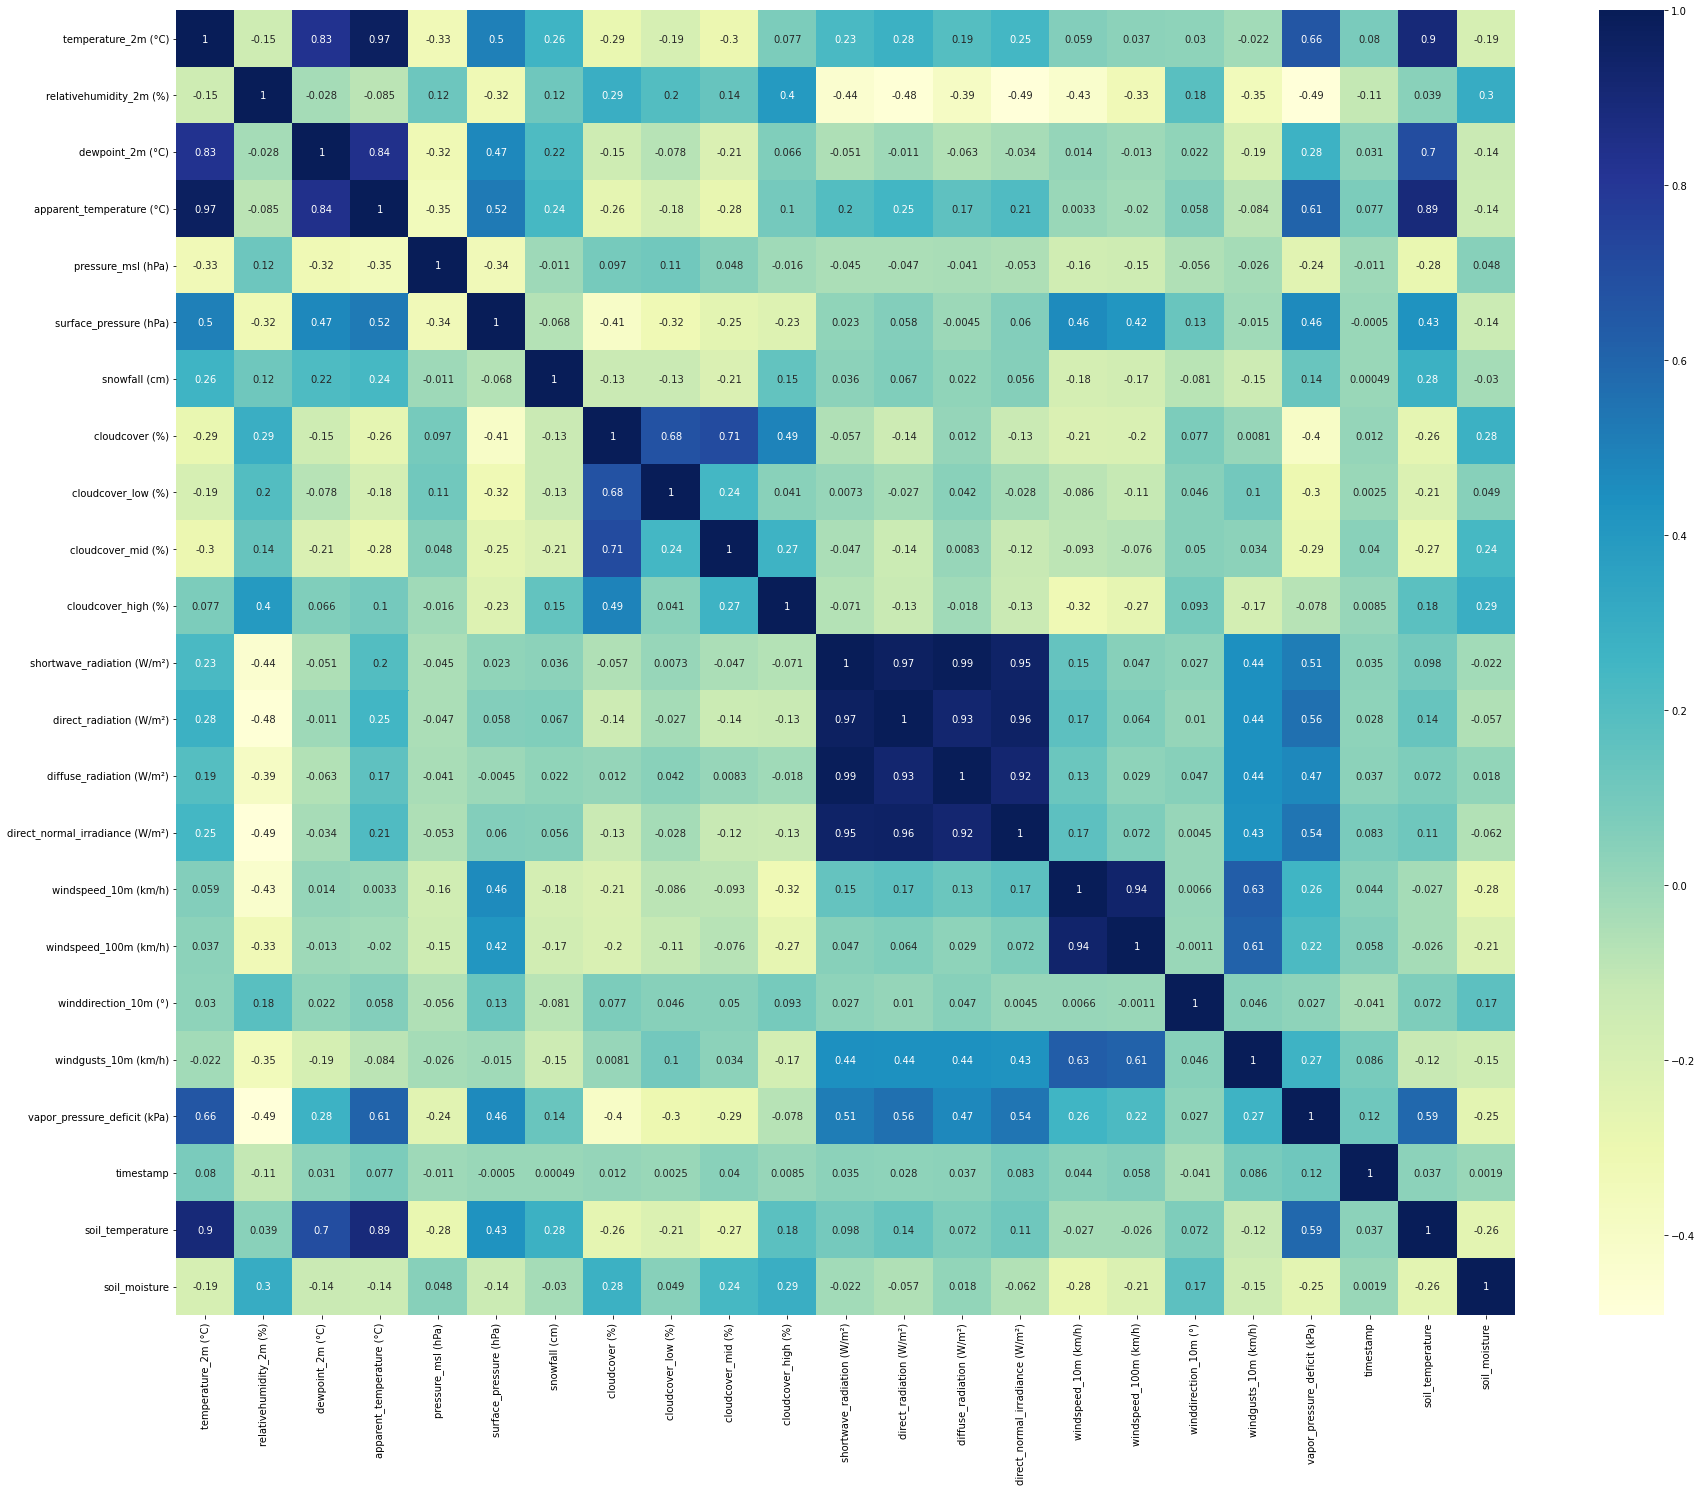

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,24))
correlation = train_hourly.corr()
dataplot = sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()

**Packaging**

Pada tahapan ini, dataset hasil *feature engineering* yang sudah dilakukan akan disimpan ke dalam bentuk csv

In [39]:
train_hourly.to_csv('train_hourly_preprocessed1.csv')

In [40]:
test_hourly.to_csv('test_hourly_preprocessed1.csv')